**MODELISATION PREDICTIVE DU RENDEMENT AGRICOLE**

   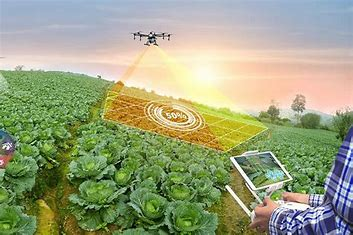

**Contexte**

Dans un monde où l'agriculture fait face à des défis croissants en matière de durabilité, d'efficacité et de gestion des ressources, la modélisation prédictive joue un rôle clé dans l'optimisation des rendements et la gestion des risques.En effet, avec une croissance démographique galopante , il est essentiel de mettre en place des outils intelligents de prévision des cultures pour aider les agriculteurs à prendre des décisions éclairées pour ainsi relever les défis liés à la sécurité alimentaire et réduire les effets du changement climatique.

**Objectif**

L'objectif de ce modèle est de fournir des prédictions précises et exploitables pour améliorer la gestion des cultures agricoles, en anticipant les rendements, en optimisant l'utilisation des ressources et en réduisant l'impact environnemental grâce à différents types d'algorithmes d'apprentissage automatique comme la régression, les arbres de décision ou encore les vecteurs à support de machine.
Ces algorithmes utiliseront des variables météorologiques (Pluviomètre, Température...), géographiques (Pays) et agicoles (type de culture, taux de pesticides...) pour prédire le rendement.


**Description du dataset**

La base de données que nous allons utiliser est constituée des rendements des dix cultures les plus consommées dans le monde et provient originellement du site web de l'Organisation des Nations Unies pour l'alimentation et l'agriculture (FAO). Elle est également disponible et téléchargeable à partir de [https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/code?datasetId=1760177].

Ces données collectées comprennent le pays, la culture, les années de 1961 à 2016, la pluviométrie annuelle, la température moyenne et la valeur des rendements de chaque culture.

Il y a exactement dix (10) types de cultures que sont:

• Le manioc  
• Le maïs  
• Plantains et autres  
• Pommes de terre  
• Riz, paddy  
• Sorgho  
• Soja  
• Patates douces  
• Blé  
• Igname


**Importation des bibliothèques**

In [202]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

**Chargement du dataset**

In [26]:
data=pd.read_csv('/content/yield_df.csv')
data

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [27]:
data = data.rename(columns={
    'Area': 'Pays',
    'Item': 'Culture',
    'Year': 'Année',
    'hg/ha_yield': 'Rendement (hg/ha)',
    'average_rain_fall_mm_per_year': 'Precipitations moyennes (mm/an)',
    'pesticides_tonnes': 'Pesticides utilisées (T)',
    'avg_temp': 'Température moyenne (°C)'
})
data['Rendement (T/ha)'] = data['Rendement (hg/ha)'] / 10000
data = data.drop(columns=['Rendement (hg/ha)', 'Unnamed: 0'])
data

,Pays,Culture,Année,Precipitations moyennes (mm/an),Pesticides utilisées (T),Température moyenne (°C),Rendement (T/ha)
0,Albania,Maize,1990,1485.0,121.00,16.37,3.6613
1,Albania,Potatoes,1990,1485.0,121.00,16.37,6.6667
2,Albania,"Rice, paddy",1990,1485.0,121.00,16.37,2.3333
3,Albania,Sorghum,1990,1485.0,121.00,16.37,1.2500
4,Albania,Soybeans,1990,1485.0,121.00,16.37,0.7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657.0,2550.07,19.76,2.2581
28238,Zimbabwe,Sorghum,2013,657.0,2550.07,19.76,0.3066
28239,Zimbabwe,Soybeans,2013,657.0,2550.07,19.76,1.3142
28240,Zimbabwe,Sweet potatoes,2013,657.0,2550.07,19.76,2.2222


**Exploration des données**

In [29]:
data.isnull().sum()

,0
Pays,0
Culture,0
Année,0
Precipitations moyennes (mm/an),0
Pesticides utilisées (T),0
Température moyenne (°C),0
Rendement (T/ha),0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Pays                             28242 non-null  object 
 1   Culture                          28242 non-null  object 
 2   Année                            28242 non-null  int64  
 3   Precipitations moyennes (mm/an)  28242 non-null  float64
 4   Pesticides utilisées (T)         28242 non-null  float64
 5   Température moyenne (°C)         28242 non-null  float64
 6   Rendement (T/ha)                 28242 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.5+ MB


In [30]:
data.describe()

,Année,Precipitations moyennes (mm/an),Pesticides utilisées (T),Température moyenne (°C),Rendement (T/ha)
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,7.705333
std,7.051905,709.81215,59958.784665,6.312051,8.495661
min,1990.000000,51.00000,0.040000,1.300000,0.005000
25%,1995.000000,593.00000,1702.000000,16.702500,1.991925
50%,2001.000000,1083.00000,17529.440000,21.510000,3.829500
75%,2008.000000,1668.00000,48687.880000,26.000000,10.467675
max,2013.000000,3240.00000,367778.000000,30.650000,50.141200


In [88]:
data['Pays'].nunique()

101

In [89]:
data['Culture'].value_counts()

,count
Culture,
Potatoes,4276
Maize,4121
Wheat,3857
"Rice, paddy",3388
Soybeans,3223
Sorghum,3039
Sweet potatoes,2890
Cassava,2045
Yams,847


In [100]:
# Les pays ayant le rendement le plus élevé
data.groupby(['Pays'],sort=True)['Rendement (T/ha)'].sum().nlargest(10)

,Rendement (T/ha)
Pays,
India,32742.0324
Brazil,16755.0306
Mexico,13078.8528
Japan,12447.0912
Australia,10911.1062
Pakistan,7389.7434
Indonesia,6919.3506
United Kingdom,5541.9990
Turkey,5226.3950


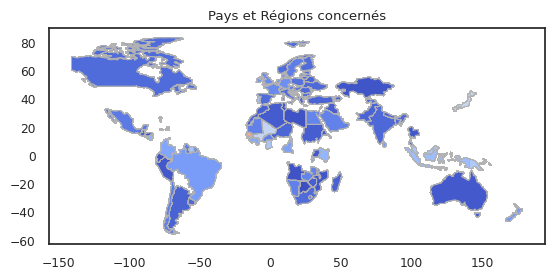

In [148]:
 #bibliothèque externe pour afficher la carte du monde
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data2 = gpd.read_file(geojson_url)

merged_data = data2.merge(data, left_on='NAME', right_on='Pays', how='left')
merged_data.plot( column='Rendement (T/ha)', cmap='coolwarm', linewidth=0.7, edgecolor='0.7')
plt.title("Pays et Régions concernés")
plt.show()


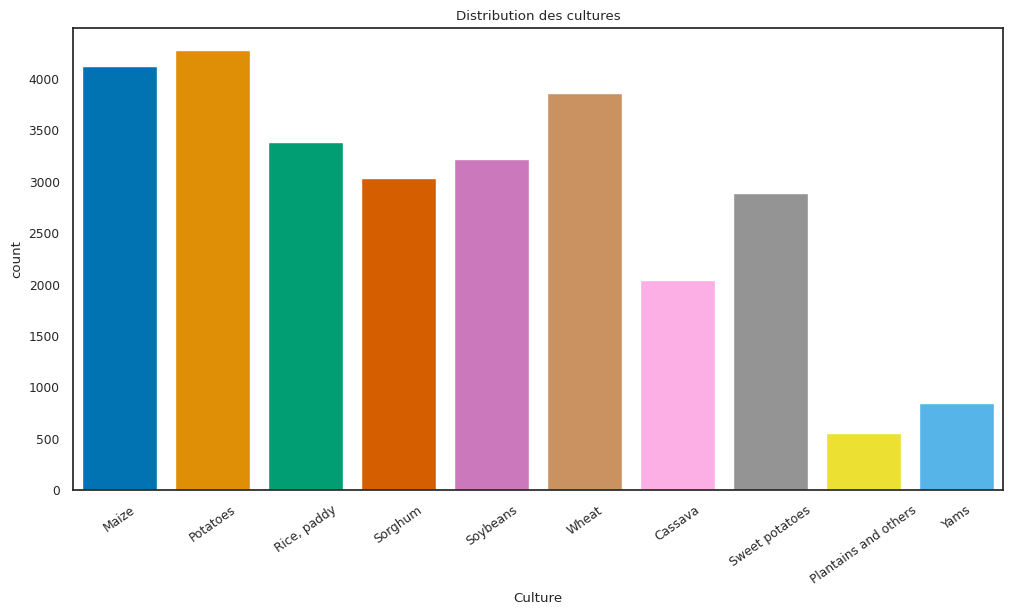

In [116]:
plt.figure(figsize=(12,6))
g2 = sns.countplot(data=data, x='Culture', palette='colorblind', saturation=1)
g2.set_title("Distribution des cultures")

g2.set_xticklabels(g2.get_xticklabels(), rotation=35)
plt.show()

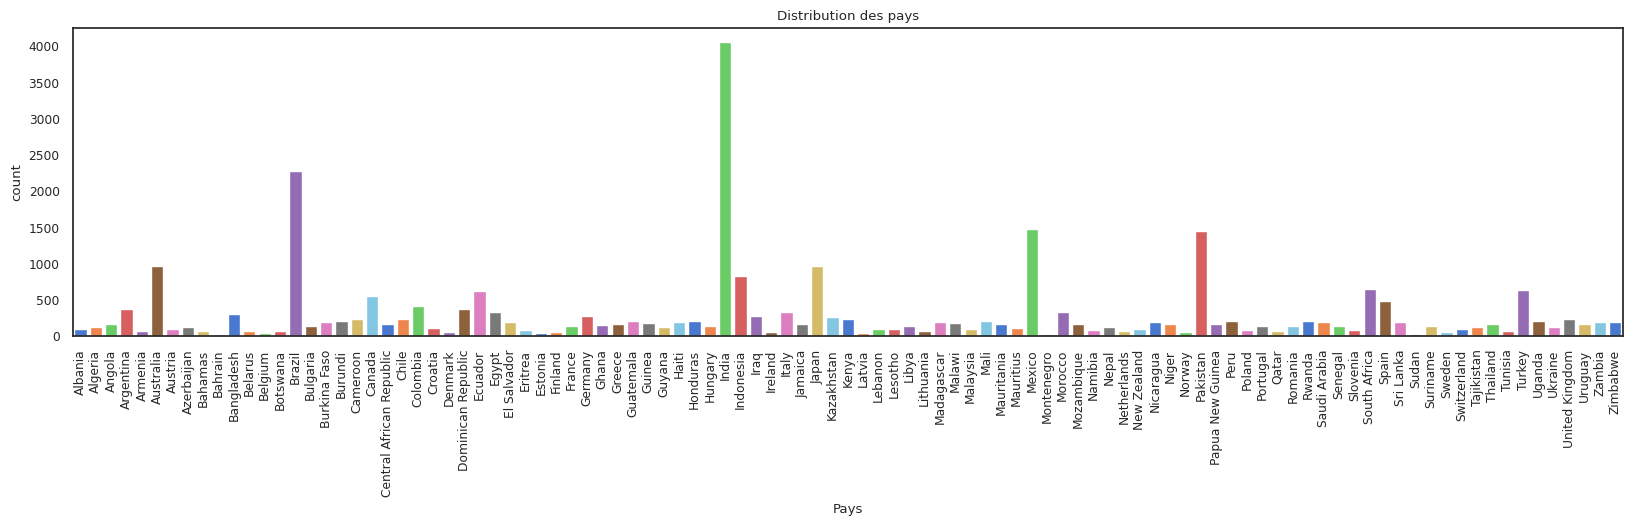

In [144]:
plt.figure(figsize=(20,4))
g2 = sns.countplot(data=data, x='Pays', palette='muted', saturation=1)
g2.set_title("Distribution des pays")

g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
plt.show()

**Encodage des variables catégorielles**


In [65]:
data_encoded = pd.get_dummies(data, columns=['Pays', 'Culture'])
data_encoded

,Année,Precipitations moyennes (mm/an),Pesticides utilisées (T),Température moyenne (°C),Rendement (T/ha),Pays_Albania,Pays_Algeria,Pays_Angola,Pays_Argentina,Pays_Armenia,...,Culture_Cassava,Culture_Maize,Culture_Plantains and others,Culture_Potatoes,"Culture_Rice, paddy",Culture_Sorghum,Culture_Soybeans,Culture_Sweet potatoes,Culture_Wheat,Culture_Yams
0,1990,1485.0,121.00,16.37,3.6613,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485.0,121.00,16.37,6.6667,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485.0,121.00,16.37,2.3333,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485.0,121.00,16.37,1.2500,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485.0,121.00,16.37,0.7000,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,2.2581,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
28238,2013,657.0,2550.07,19.76,0.3066,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28239,2013,657.0,2550.07,19.76,1.3142,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
28240,2013,657.0,2550.07,19.76,2.2222,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


**Corrélation avec le rendement**

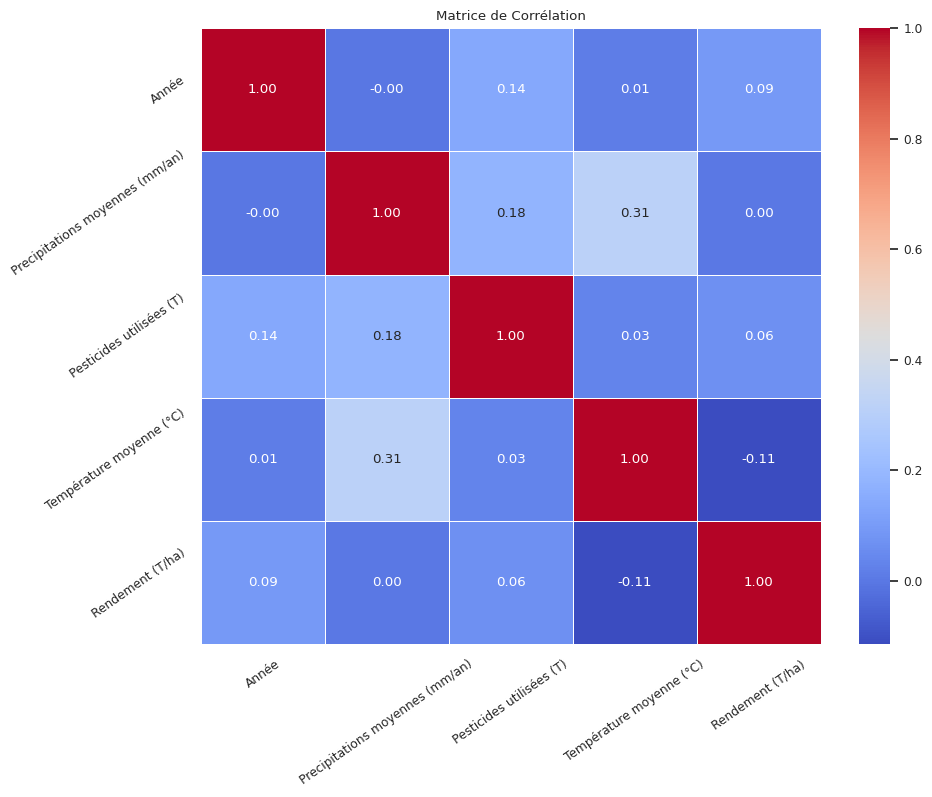

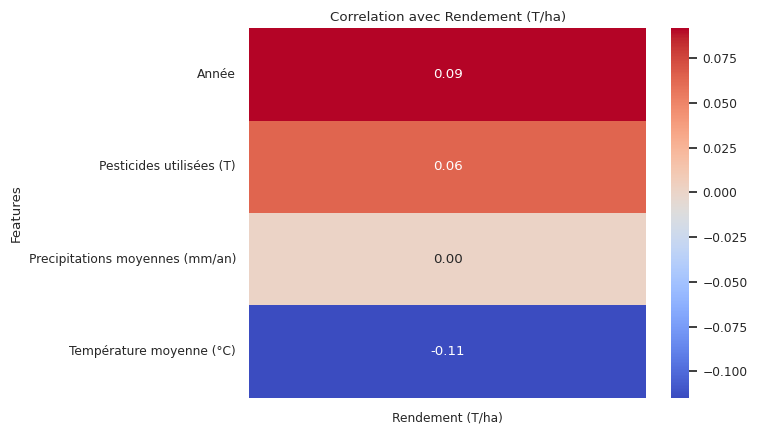

In [75]:
correlation_matrix = data.drop(columns=['Pays', 'Culture'], axis=1).corr()

# Affichage de la matrice de corrélation sous forme de carte thermique (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.xticks(rotation=35)
plt.yticks(rotation=35)
plt.show()

# Créer un tableau de des coefficients correlation avec la colonne Rendement (T/ha)
corr = data.drop(columns=['Pays', 'Culture']).corr()
target_corr = corr['Rendement (T/ha)'].drop('Rendement (T/ha)')

# Trier les coefficients de corrélation dans l'ordre décroissant
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation avec Rendement (T/ha)')
plt.ylabel('Features')
plt.show()

**Normalisation et split des données**

In [82]:
X = data_encoded.drop(columns=['Rendement (T/ha)', 'Année'])
y = data_encoded['Rendement (T/ha)']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**1-Linear Regression**


In [86]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

results = {}
# Calcul des métriques
mse = mean_squared_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)
results = {'MSE': mse, 'R^2': r2}
results

{'MSE': 18.24177890897074, 'R^2': 0.7538934613691838}

**2-Random Forest**

In [187]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

results = {}

# Calcul des métriques
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
results = {'MSE': mse, 'R^2': r2}
results

{'MSE': 1.9957541627531754, 'R^2': 0.9730745476412015}

# **3- SVR**

In [200]:
svr=SVR(C=10, kernel='rbf', gamma='scale')
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
}
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

results = {}
# Calcul des métriques
mse = mean_squared_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)
results = {'MSE': mse, 'R^2': r2}
results

{'MSE': 5.219796752978426, 'R^2': 0.9295778050132953}

# **4-DECISION TREE**




In [214]:
Dtree=DecisionTreeRegressor(max_depth=19, min_samples_split=2, min_samples_leaf=1)
Dtree.fit(X_train,y_train)
Dtree_pred=Dtree.predict(X_test)

results = {}
# Calcul des métriques
mse = mean_squared_error(y_test, Dtree_pred)
r2 = r2_score(y_test, Dtree_pred)
results = {'MSE': mse, 'R^2': r2}
results


{'MSE': 2.843547601507063, 'R^2': 0.961636655003273}

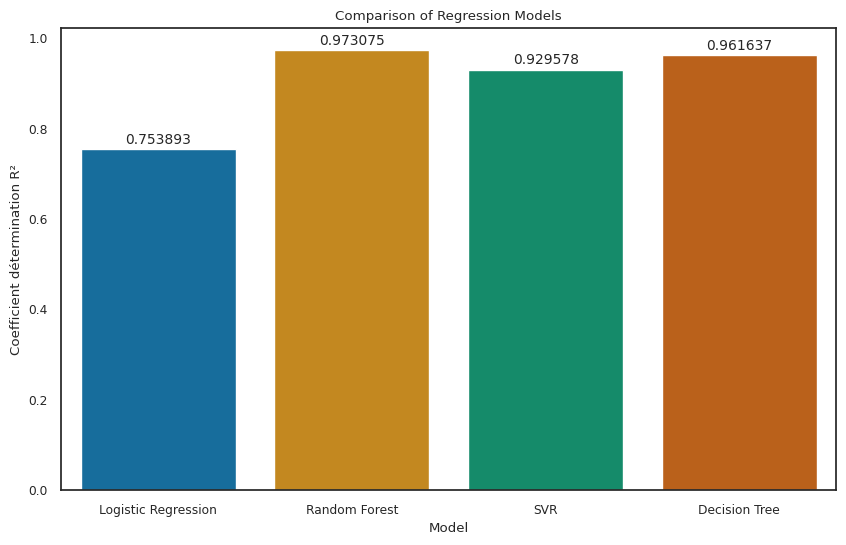

In [230]:
models = ['Logistic Regression', 'Random Forest', 'SVR', 'Decision Tree']
accuracies = [
    r2_score(y_test, lr_pred),
    r2_score(y_test, rf_pred),
    r2_score(y_test, svr_pred),
    r2_score(y_test, Dtree_pred)
]
df_accuracies = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Model', y='Accuracy', data=df_accuracies, palette="colorblind")

# Ajouter les valeurs de R² sur chaque barre
for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=2)

plt.title("Comparison of Regression Models")
plt.ylabel("Coefficient détermination R²")
plt.xlabel("Model")
plt.show()

D'après les resultats obtenus par les différents modèles entraînés, le  **Regresseur de Random Forest** reste le plus performant.
C'est donc lui qui sera notre meilleur modèle.

**Conclusion**

En guise de conclusion la  prédiction du rendement agricole à l'aide de l'apprentissage automatique représente une avancée significative dans la gestion des cultures et la prise de décisions agricoles. En offrant une prédiction fiable sur le rendement il permet aux agriculteurs de mieux planifier leurs récoltes, d'optimiser l'utilisation des ressources (eau, engrais, etc.) et de réduire les pertes dues à des conditions climatiques imprévisibles.
*texte en italique*
Grâce à l'intégration de données climatiques  ce modèle aide à anticiper les besoins en irrigation, à prédire les risques liés aux intempéries et à proposer des stratégies agricoles adaptées pour chaque type de culture.

Ainsi, il contribue non seulement à améliorer les rendements, mais aussi à promouvoir une agriculture plus durable, résiliente et adaptée aux défis environnementaux actuels.



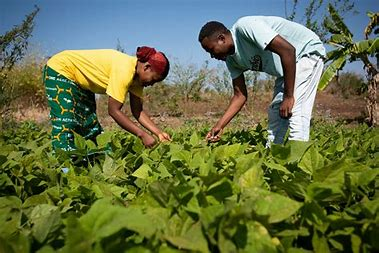